In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel("Sample - Superstore.xls")
print(f"sample:")
data.sample(5)

sample:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9946,9947,CA-2014-111157,2014-03-02,2014-03-06,Standard Class,NH-18610,Nicole Hansen,Corporate,United States,Philadelphia,...,19120,East,TEC-AC-10004353,Technology,Accessories,Hypercom P1300 Pinpad,151.200,3,0.2,32.1300
5970,5971,CA-2014-141726,2014-07-20,2014-07-22,First Class,CC-12145,Charles Crestani,Consumer,United States,San Diego,...,92105,West,OFF-PA-10002230,Office Supplies,Paper,Xerox 1897,19.920,4,0.0,9.7608
4352,4353,CA-2017-107748,2017-12-10,2017-12-12,Second Class,AG-10330,Alex Grayson,Consumer,United States,Stockton,...,95207,West,TEC-PH-10003215,Technology,Phones,Jackery Bar Premium Fast-charging Portable Cha...,95.840,4,0.2,34.7420
2059,2060,CA-2014-106439,2014-10-31,2014-11-04,Standard Class,GG-14650,Greg Guthrie,Corporate,United States,Los Angeles,...,90049,West,OFF-FA-10002975,Office Supplies,Fasteners,Staples,11.340,3,0.0,5.2164
7626,7627,US-2015-159499,2015-11-21,2015-11-23,Second Class,EM-14095,Eudokia Martin,Corporate,United States,Phoenix,...,85023,West,OFF-AP-10002867,Office Supplies,Appliances,Fellowes Command Center 5-outlet power strip,325.632,6,0.2,28.4928


In [4]:
print(f"shape => {data.shape}")
print(f"size => {data.size}")
print(f"info:")
data.info()

shape => (9994, 21)
size => 209874
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   

In [5]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.loc[:,["Sales","Quantity","Discount","Profit"]].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.iloc[:,-4:].corr()["Profit"]

Sales       0.479064
Quantity    0.066253
Discount   -0.219487
Profit      1.000000
Name: Profit, dtype: float64

<Axes: >

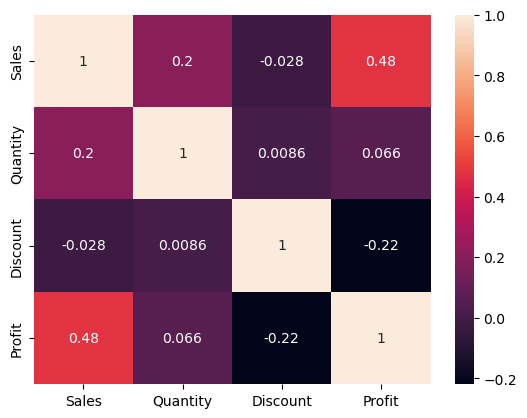

In [9]:
sns.heatmap(data.iloc[:,-4:].corr(),annot=True)

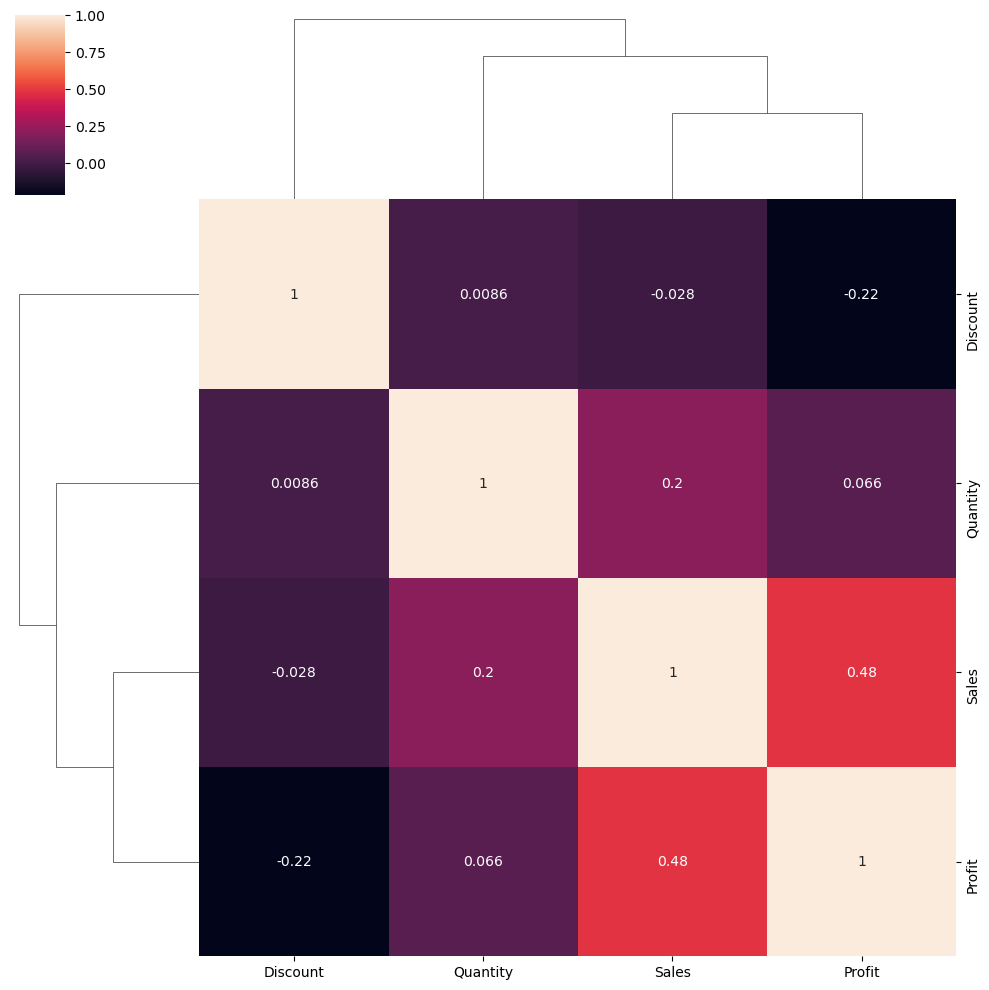

In [10]:
sns.clustermap(data.iloc[:,-4:].corr(),annot=True)

In [11]:
unique_values=pd.DataFrame(data.nunique())
unique_values.loc[unique_values.values<50]

,0
Ship Mode,4
Segment,3
Country,1
State,49
Region,4
Category,3
Sub-Category,17
Quantity,14
Discount,12


In [12]:
data.drop(["Row ID","Order ID","Customer ID","Product ID","Postal Code","Country"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Ship Date      9994 non-null   datetime64[ns]
 2   Ship Mode      9994 non-null   object        
 3   Customer Name  9994 non-null   object        
 4   Segment        9994 non-null   object        
 5   City           9994 non-null   object        
 6   State          9994 non-null   object        
 7   Region         9994 non-null   object        
 8   Category       9994 non-null   object        
 9   Sub-Category   9994 non-null   object        
 10  Product Name   9994 non-null   object        
 11  Sales          9994 non-null   float64       
 12  Quantity       9994 non-null   int64         
 13  Discount       9994 non-null   float64       
 14  Profit         9994 non-null   float64       
dtypes: datetime64[ns](2),

# Univariate Analysis

## Categorical Columns

<Axes: xlabel='count', ylabel='Category'>

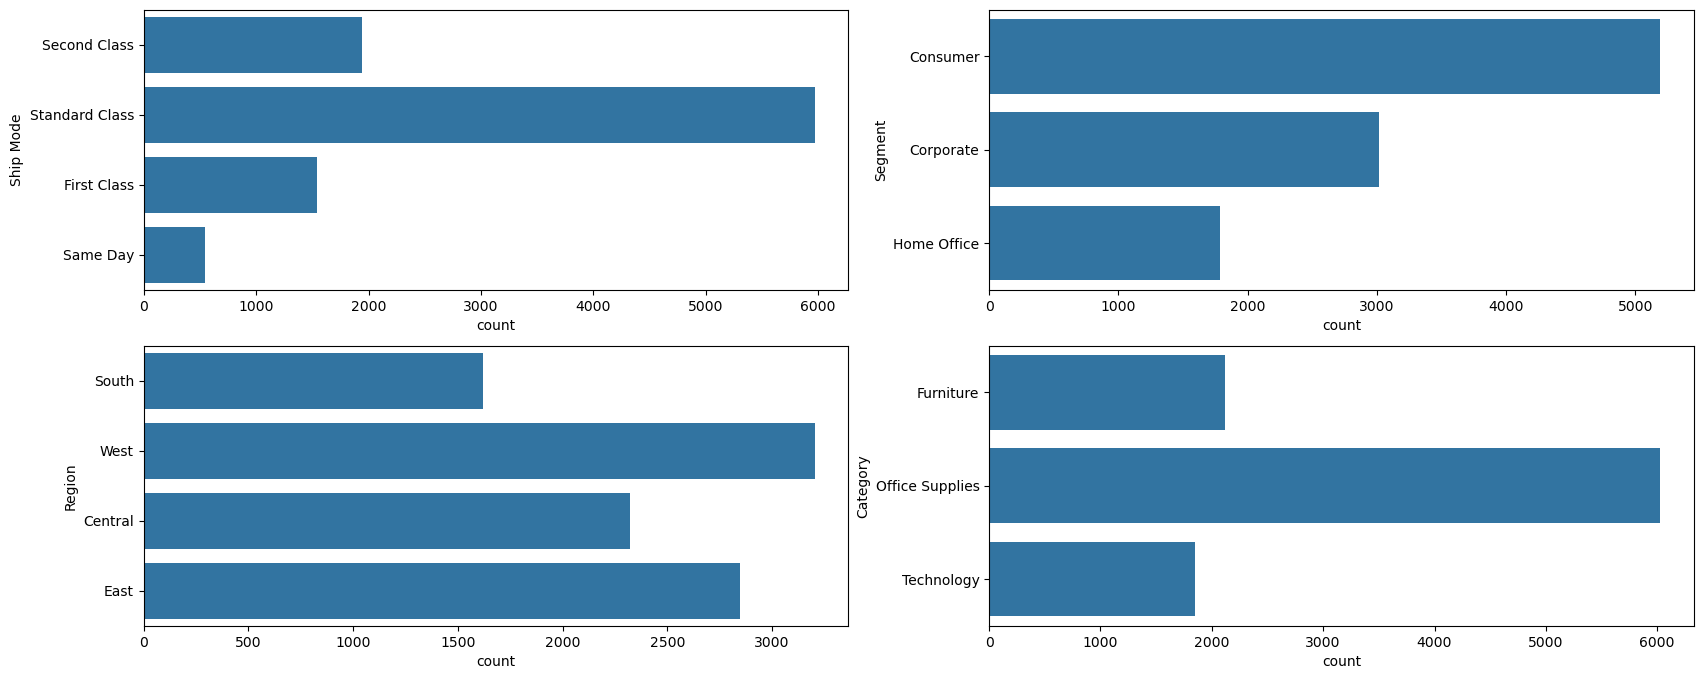

In [13]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(20,8))
sns.countplot(data["Ship Mode"],ax=ax[0,0],)
sns.countplot(data["Segment"],ax=ax[0,1],)
sns.countplot(data["Region"],ax=ax[1,0],)
sns.countplot(data["Category"],ax=ax[1,1],)

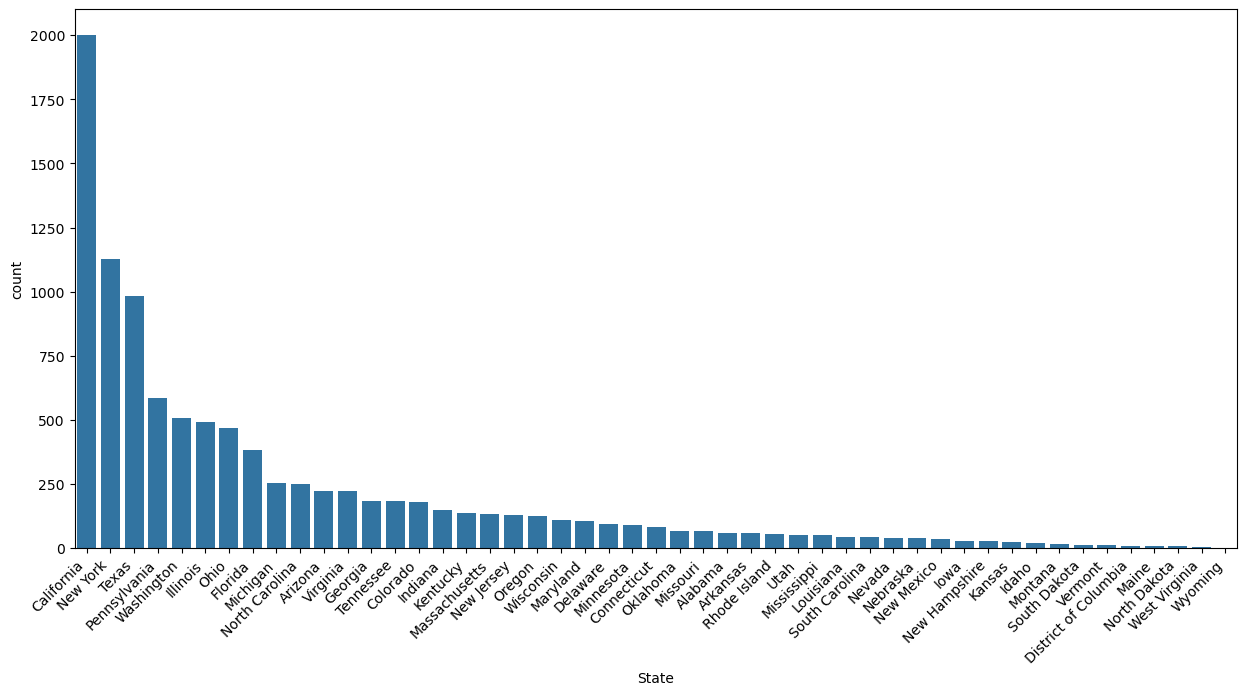

In [14]:
plt.figure(figsize=(15,7))
sorted_order=data["State"].value_counts().sort_values(ascending=False).index
sns.countplot(x=data["State"],order=sorted_order)
plt.xticks(rotation=45,ha='right',va="top")
plt.show()

<Axes: ylabel='count'>

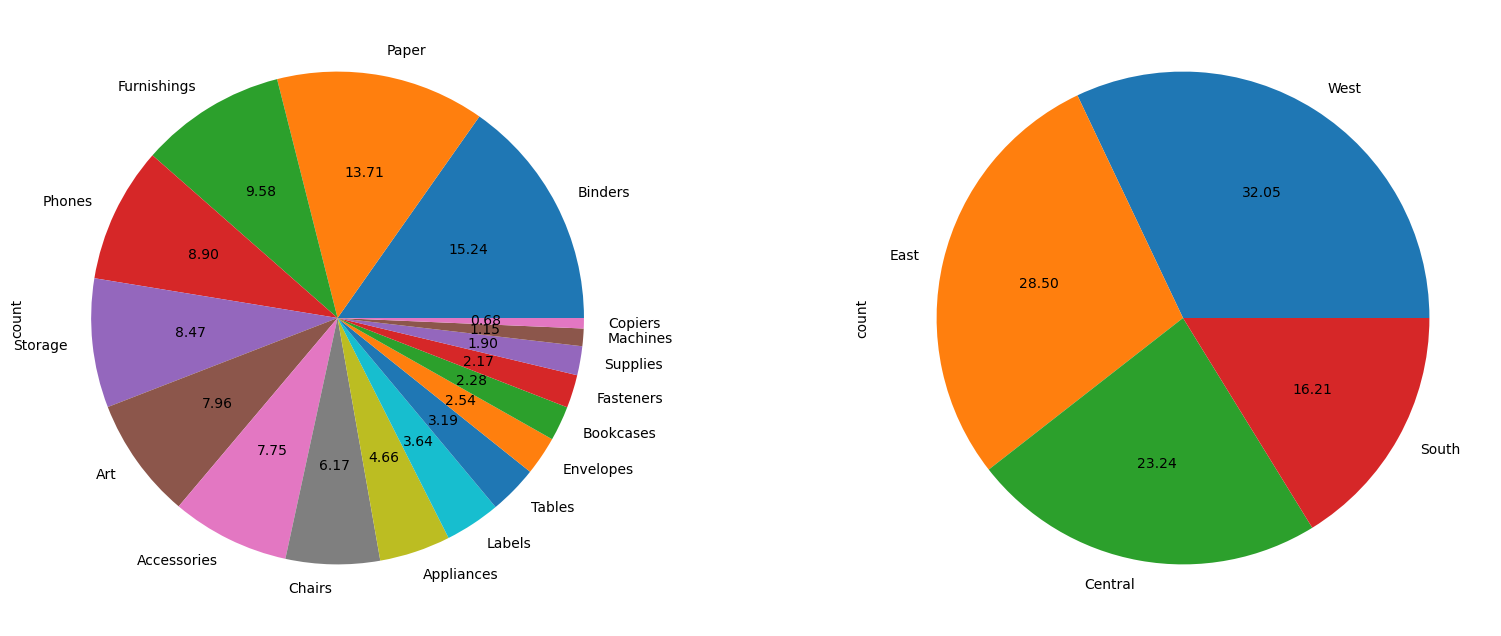

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
data["Sub-Category"].value_counts().plot(kind="pie",autopct="%.2f",ax=ax[0])
data["Region"].value_counts().plot(kind="pie",autopct="%.2f",ax=ax[1])

## Numerical columns

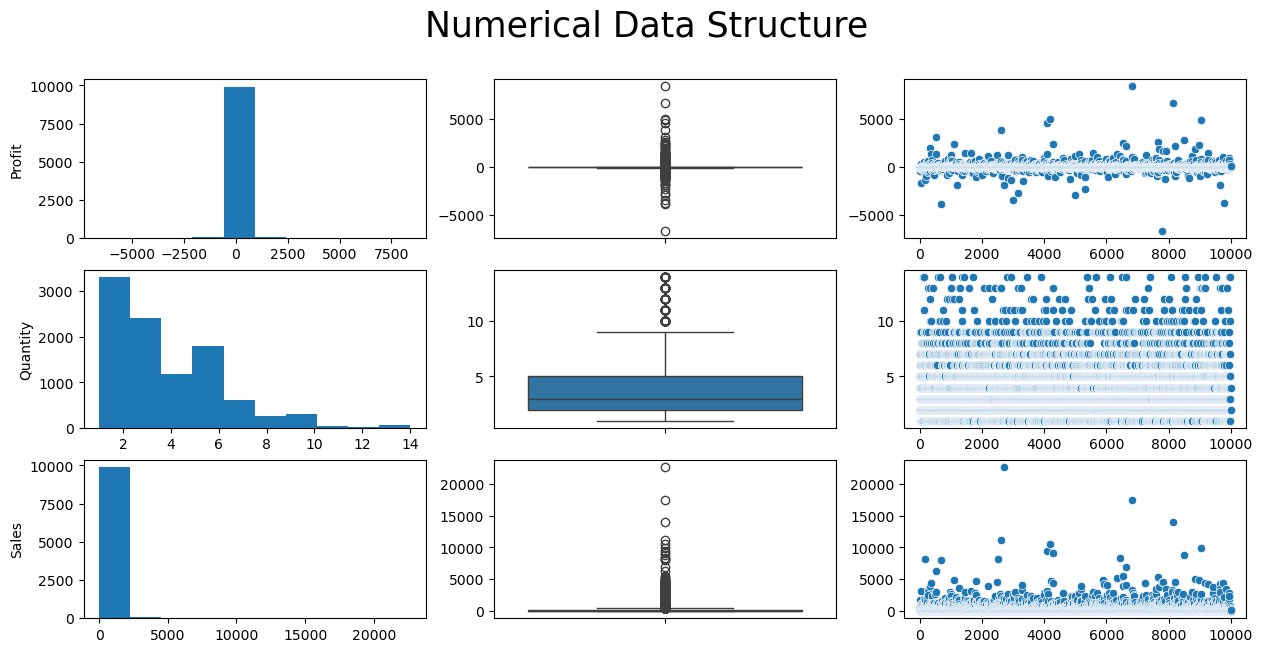

In [16]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,7))

# Profit
ax[0,0].hist(data["Profit"])
sns.boxplot(data["Profit"],ax=ax[0,1]).set(ylabel=None)
sns.scatterplot(data["Profit"],ax=ax[0,2]).set(ylabel=None)

# Quantity
ax[1,0].hist(data["Quantity"])
sns.boxplot(data["Quantity"],ax=ax[1,1]).set(ylabel=None)
sns.scatterplot(data["Quantity"],ax=ax[1,2]).set(ylabel=None)

# Sales
ax[2,0].hist(data["Sales"])
sns.boxplot(data["Sales"],ax=ax[2,1]).set(ylabel=None)
sns.scatterplot(data["Sales"],ax=ax[2,2]).set(ylabel=None)

# labels
ax[0,0].set(ylabel="Profit")
ax[1,0].set(ylabel="Quantity")
ax[2,0].set(ylabel="Sales")
fig.suptitle("Numerical Data Structure",fontsize=25)

plt.show()

# Bivariate Analysis

## 1.ScatterPlot (Numerical-Numerical)

<Axes: xlabel='Profit', ylabel='Sales'>

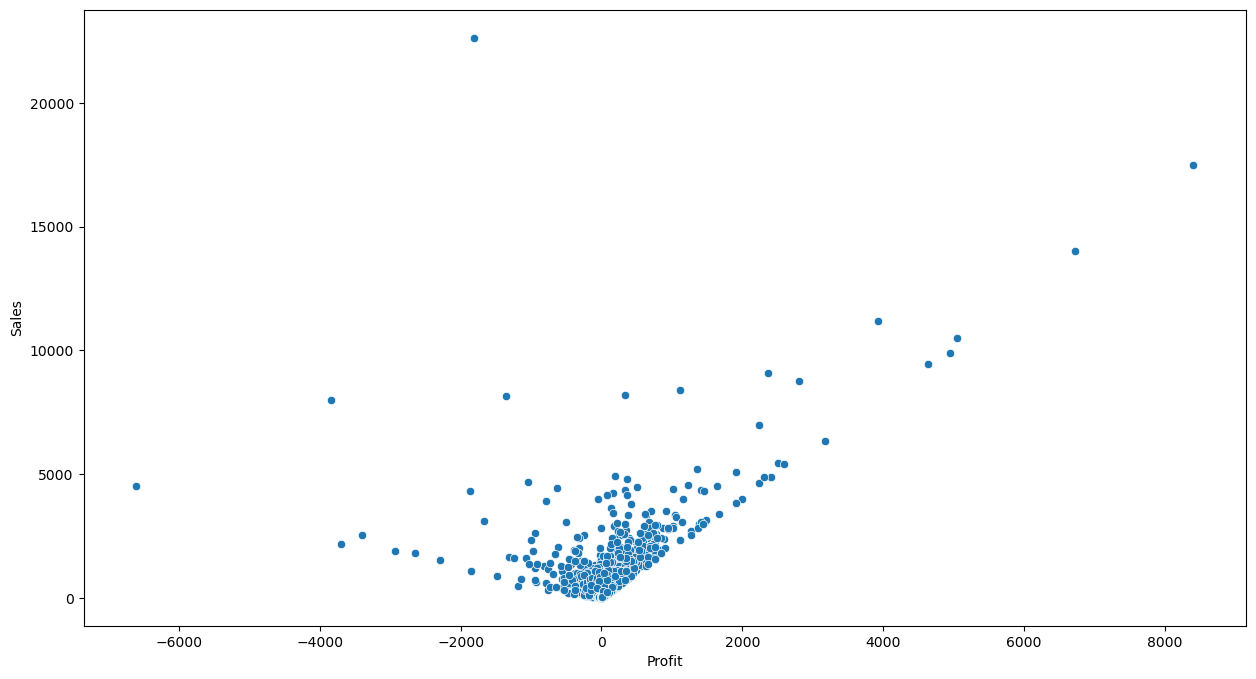

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=data["Profit"],y=data["Sales"])

## 2.ScatterPlot (Numerical-Numerical) filtered

<Axes: xlabel='Profit', ylabel='Sales'>

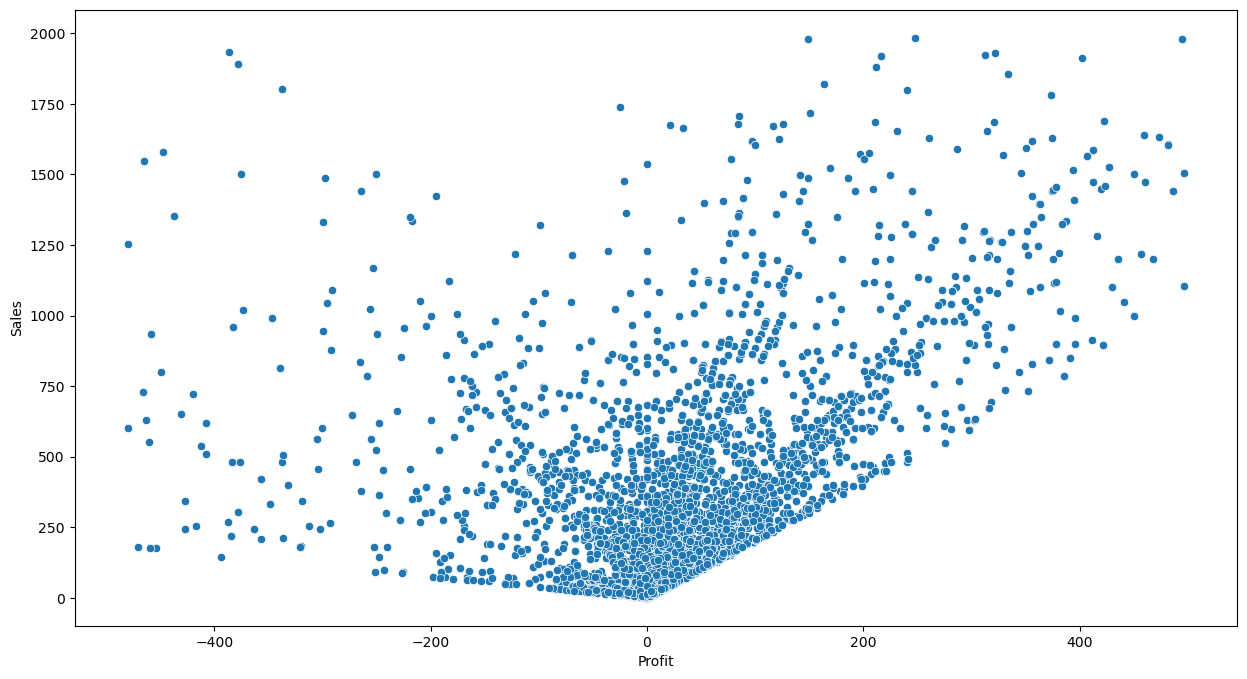

In [18]:
plt.figure(figsize=(15,8))

# filtered data
filtered_profit_data=data["Profit"][data["Profit"]>-500][data["Profit"]<500]
filtered_sales_data=data["Sales"][data["Sales"]<2000]

sns.scatterplot(x=filtered_profit_data,y=filtered_sales_data)

## 3.ScatterPlot (Numerical-Numerical) filtered and Multiple perameters

<Axes: xlabel='Profit', ylabel='Sales'>

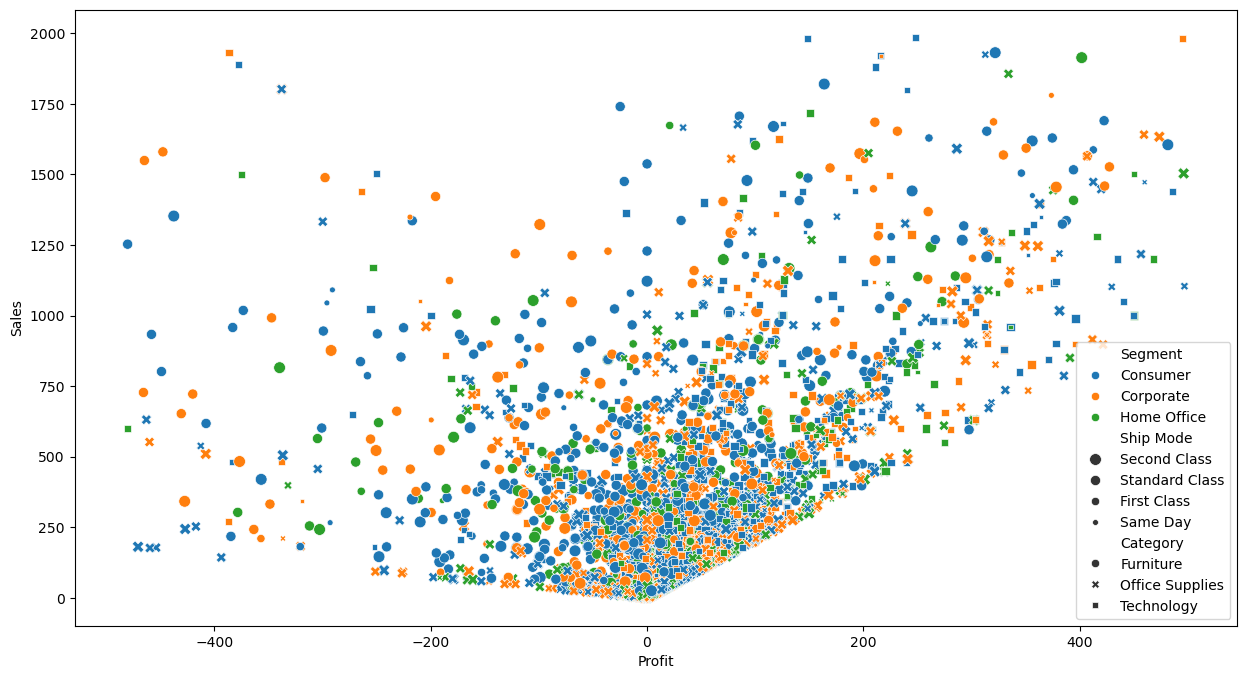

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=filtered_profit_data, y=filtered_sales_data, hue=data["Segment"],style=data["Category"],size=data["Ship Mode"])

## 4.Barplot (Numerical-Categorical)

<Axes: xlabel='Region', ylabel='Profit'>

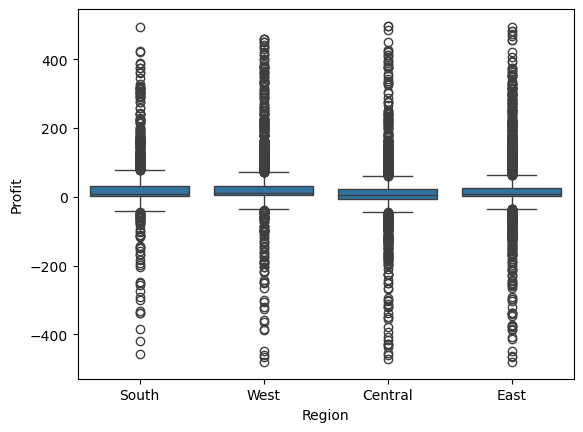

In [20]:
sns.boxplot(x=data["Region"],y=filtered_profit_data)

## Distploy (Numerical - categorical)

<Axes: ylabel='Frequency'>

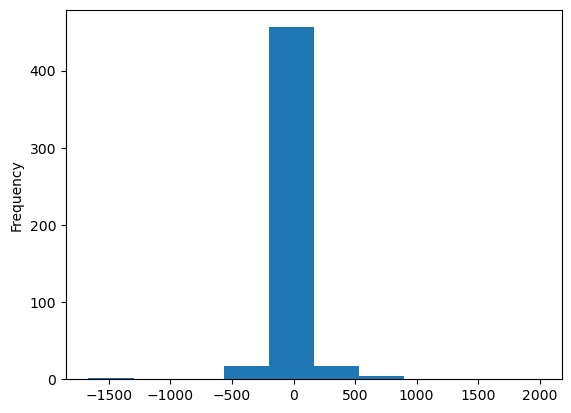

In [21]:
data["Profit"][:500].plot(kind='hist')

## Pairplot (Numerical - Numerical)

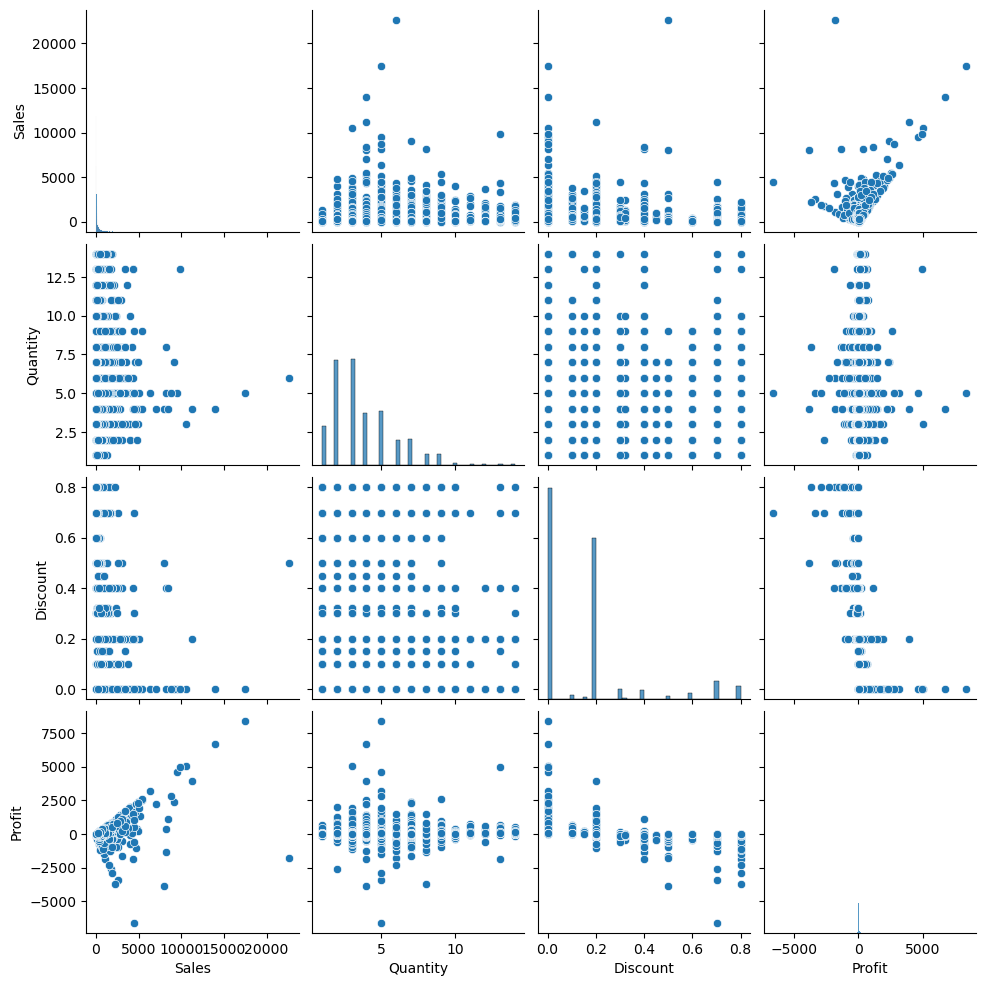

In [22]:
sns.pairplot(data.iloc[:,-4:])

## Lineplot (Numerical - Numerical)

In [38]:
date_wise_sales_data = data.groupby(data["Order Date"].dt.year)["Sales"].sum().reset_index()
date_wise_sales_data

,Order Date,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


(2014.0, 2017.0)

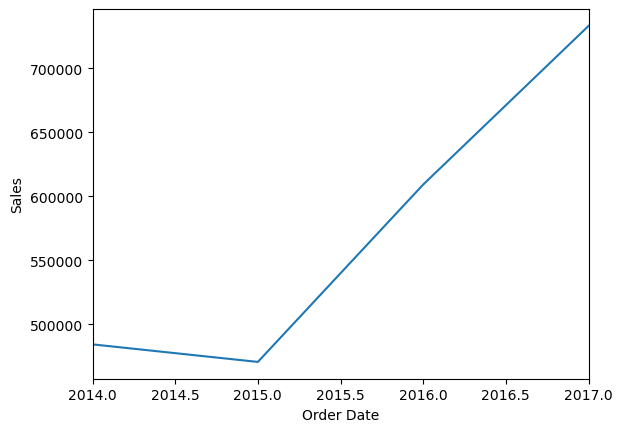

In [46]:
sns.lineplot(x=date_wise_sales_data["Order Date"], y=date_wise_sales_data["Sales"])
plt.xlim(2014,2017)